In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import scipy.stats as stats
import pymc3 as pm
import arviz as az
sns.set()

#### 1. The poisson PMF

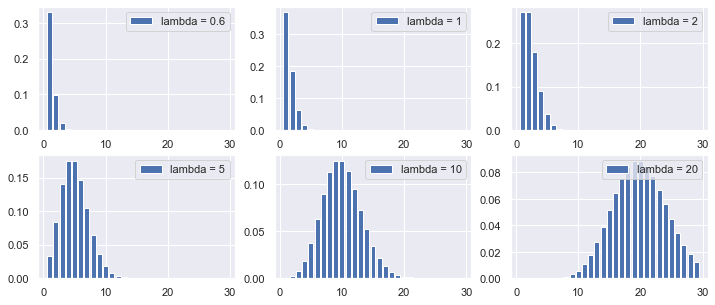

In [60]:
figsize(12,5)
for i, lam in enumerate([0.6,1,2,5,10,20]):
    plt.subplot(2,3,i+1)
    vals = np.arange(1,30)
    probs = [stats.poisson(lam).pmf(i) for i in vals]
    plt.bar(vals, probs, label = 'lambda = {}'.format(lam))
    plt.legend(loc = 'upper right')
plt.show()

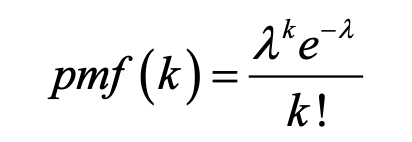

当k = 0的时候，$pmf(0) = e^{-\lambda}$    
真实的柏松分布中，我们经常遇到0非常多的情况   
$y = 1 - \phi + \phi * e^{-\lambda}$

#### How the data is generated

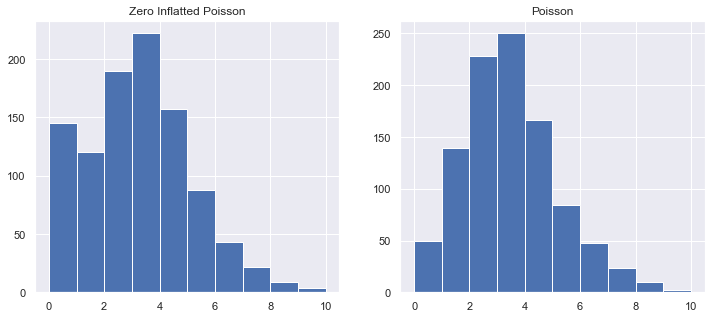

In [64]:
N = 1000
phi = 0.1
lam = 3

plt.subplot(1,2,1)
data = (np.random.random(N) > phi).astype(int) * stats.poisson(lam).rvs(N)
plt.hist(data)
plt.title('Zero Inflatted Poisson')

plt.subplot(1,2,2)
plt.hist(stats.poisson(lam).rvs(N))
plt.title('Poisson')
plt.show()

#### Pymc3 to regress the data

In [65]:
with pm.Model() as model:
    phi = pm.Beta('phi',1,1)
    mask = pm.Bernoulli('mask',phi, shape = N)
    lam = pm.Exponential('lam',1/4)
    
    
    
    
    